<h1>Adaptacyjny neuron liniowy</h1>

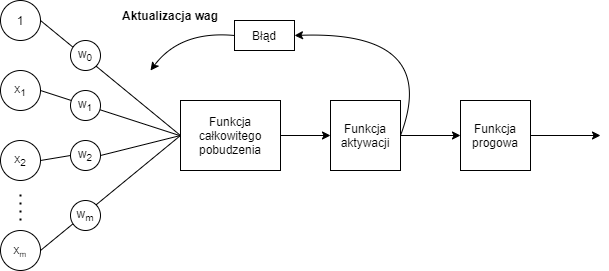

In [2]:
from IPython.display import Image
Image("./diag.png")

<h3>Funkcja progowa</h3>
$
\Phi(f(z)) = \left\{ \begin{array}{ll}
1 & \ jesli\ f(z)\ge\theta\\
-1 & \ jesli\ f(z) < \theta
\end{array} \right.\\
f(z)\ -\ calkowite\ pobudzenie\ po\ zastosowaniu\ funkcji\ aktywacji
$
<hr>

<h3>Funkcja aktywacji - Adaline implementuje liniową jej postać</h3>

$
f(z) = z
$

<hr>


<h3>Funkcja całkowitego pobudzenia</h3>
$
z = w_1x_1 + w_2x_2 + ... + w_mx_m
$ <br><br>
Wartość progowa $\theta$ może zostać przeniesiona na lewą stronę równania (funkcja progowa), następnie definiując $w_0 = -\theta$ oraz $x_0 = 1$, całkowite pobudzenie przybierze postać:<br>
$
z = w_0x_0 + w_1x_1 + w_2x_2 + ... + w_mx_m
$ - jest to równanie zgodne z powyższym schematem. <br>
<br>
Należy pamiętać jednak o dodatkowym założeniu dla funkcji progowej:<br>
<br>
$
\Phi(f(z)) = \left\{ \begin{array}{ll}
1 & \ jesli\ f(z)\ge0\\
-1 & \ jesli\ f(z) < 0
\end{array} \right.\\
$<br>
Waga $w_0$ jest okreslana <b>obciążeniem jednostkowym</b>.
<hr>

<h3>Funkcja kosztu</h3>
<br>
Trening algorytmu Adaline opiera się o optymalizację funkcji kosztu. Omawiany przypadek implementuje <b>sumę kwadratów błędów (SSE)</b>.
<br>
<br>
$
J(w) = \sum_i(y^{(i)} - f(z^{(i)}))^{2}
$
<hr>

<h3>Pochodna cząstkowa funkcji kosztu</h3>
<br>
$
\frac{\partial J}{\partial w_j} = \frac{\partial J}{\partial w_j}  \sum_i(y^{(i)} - f(z^{(i)}))^{2}\\
\frac{\partial J}{\partial w_j} = \sum_i 2(y^{(i)} - f(z^{(i)}))\frac{\partial J}{\partial w_j}(y^{(i)} - \sum_k w_{k}x_{k}^{(i)})\\
\frac{\partial J}{\partial w_j} = 2\sum_i (y^{(i)} - f(z^{(i)}))(-x_j^{(i)})
$

<h3>Metoda gradientu prostego</h3>
Wskazana procedura pozwala iteracyjnie dojść do argumentu, dla którego optymalizowana funkcja osiąga minumum.<br>
Poszczególne kroki optymalizacji funkcji $f(x) = x^2$:<br><br>
1. Wyznaczenie gradientu funkcji dla argumentu $x_0$ - gradientem ($\triangledown f(x)$) jest wartość pierwszej pochodnej dla wskazanego argumentu. <br>
2. Zmiana wartości argumentu wg. wzoru $x_0 = x_0 - n * \triangledown f(x_0)$, gdzie $n$ jest współczynnikiem uczenia. <br>
3. Należy powtarzać 1 oraz 2 krok aż do momentu spełniania kryterium zatrzymania
<hr>

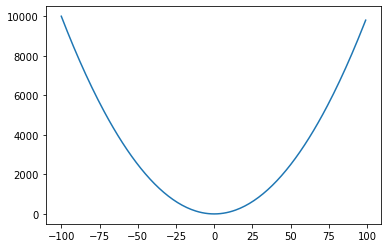

In [3]:
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: x ** 2
x = np.arange(-100, 100)
plt.plot(x, f(x))
plt.show()

In [4]:
start_point = 75
learning_rate = 0.1
derivative_f = lambda x: 2 * x

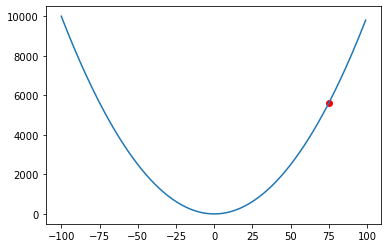

In [5]:
plt.plot(x, f(x))
plt.scatter(start_point, f(start_point), color = "red")
plt.show()

<b>Czerwony - punkt początkowy.</b>

In [6]:
next_point = start_point - learning_rate * derivative_f(start_point)

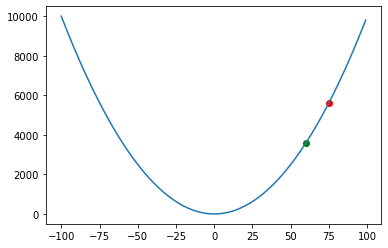

In [7]:
plt.plot(x, f(x))
plt.scatter(start_point, f(start_point), color = "red")
plt.scatter(next_point, f(next_point), color = "green")
plt.show()

<b>Zielony - wartość funkcji dla argument po jednej iteracji</b>
<hr>

<h3>Istotność współczynnika uczenia</h3>
<hr>

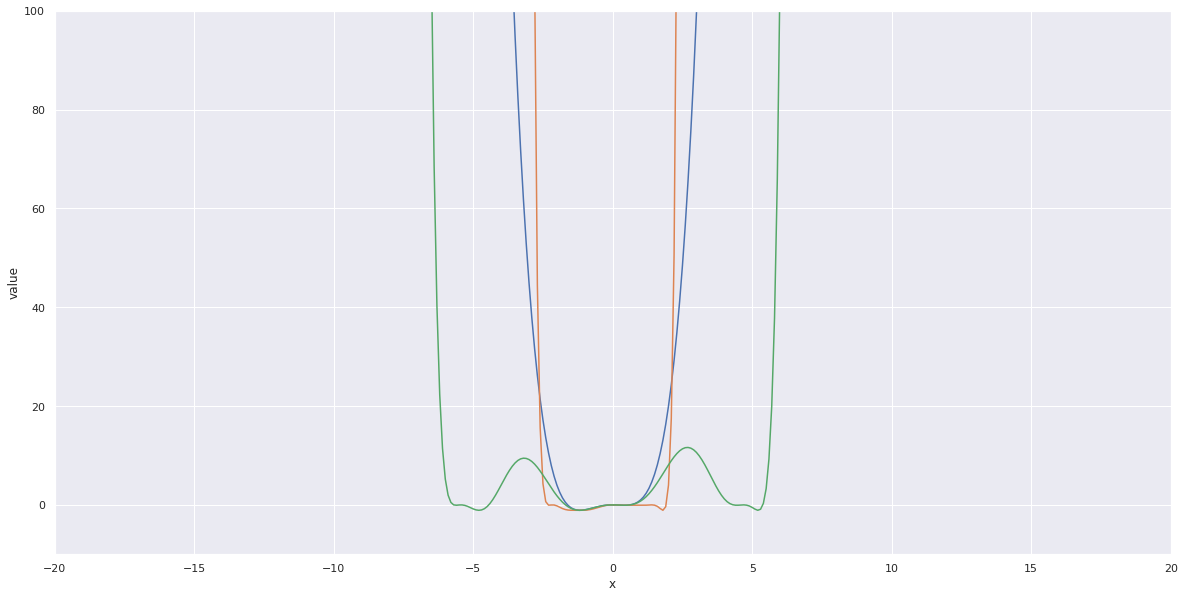

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

f = lambda x: x ** 4 + x ** 3 - x ** 2 
derivative_f = lambda x: 4 * (x ** 3) + (x ** 2) * 3 - 2 * x
decrease = lambda lr, x: f(x - lr * derivative_f(x)) 

fig, ax = plt.subplots(1, figsize = (20, 10))
ax.set_ylim([-10, 100])
ax.set_xlim([-20, 20])
x = np.arange(-50, 50, 0.1)
sns.lineplot(
    data = pd.DataFrame([x, f(x)], index = ["x", "value"]).transpose(),
    x = "x", y = "value", ax = ax)
sns.lineplot(
    data = pd.DataFrame([x, decrease(0.1, x)], index = ["x", "value"]).transpose(),
    x = "x", y = "value", ax = ax)
sns.lineplot(
    data = pd.DataFrame([x, decrease(0.01, x)], index = ["x", "value"]).transpose(),
    x = "x", y = "value", ax = ax)
plt.show()

<b>Powyższy wykres przedstawia trzy funkcje:</b><br>
$f(x)$ <br>
$f(x - 0.1 * f'(x))$<br>
$f(x - 0.01 * f'(x))$<br>
<br>
Nie trudno zauwazyć, że skorzystanie ze współczynnika uczenia o wartości $0.1$ i rozpoczęcie iteracji od (przykładowo) $x_0 = -5$ nie przyniesie pożądnego efektu.
<hr>

<h3>Podsumowanie</h3>
Proces "uczenia się" adaptacyjnego neuronu liniowego opiera się o optymalizację funkcji kosztu, której wartość reprezentuje błędnie sklasyfikowane obserwacje.
<hr>

In [9]:
class Adaline():
    def __init__(self, lr = 0.05, epochs = 20, random_state = 2):
        self.lr = lr
        self.epochs = epochs
        self.random_state = random_state
    
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.w = rand.normal(size = 1 + X.shape[1])
        self.cost = []
        for _ in range(self.epochs):
            output = self.forward(X)
            errors = (y - output)
            self.w[1:] += self.lr * X.T.dot(errors) * 2
            self.w[0] += self.lr * errors.sum() * 2
            self.cost.append((errors**2).sum())
     
    def forward(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]
    
    def predict(self, X):
        return np.where(self.forward(X) >= 0.0, 1, -1)

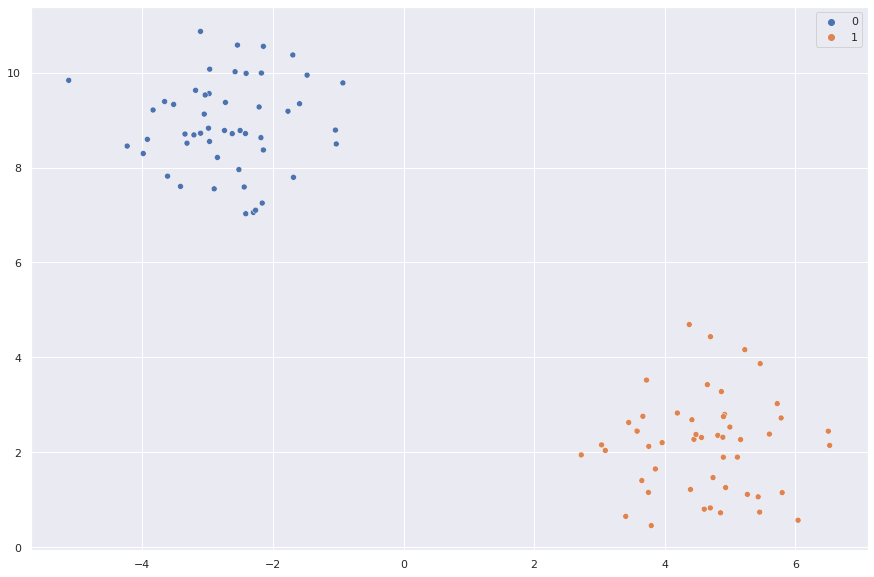

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 42)
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y, ax = ax)
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = np.where(y == 0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                                    stratify = y)
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [12]:
adaline = Adaline(lr = 0.005, epochs = 10)
adaline.fit(X_train, y_train)

In [13]:
from sklearn.metrics import classification_report

y_pred = adaline.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [14]:
adaline.cost

[189.23544643333426,
 15.487430629471099,
 6.83608176049555,
 5.529299667279835,
 4.823361974114322,
 4.344006206856722,
 4.0125537530445,
 3.78242138678838,
 3.6219137338832015,
 3.509265009854396]